# 4.3
## 1.
### Imports

In [18]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

### Ler os dados

In [2]:
dados_lidos = pd.read_csv("CO_data.csv")

### Variáveis

In [3]:
# Listas de paises e anos
areas_geo = ["Africa", "Asia", "South America", "North America", "Europe", "Oceania"]
anos = list(range(2000, 2022))

# Definição das condições de filtragem.
condicao_anos = dados_lidos["year"].isin(anos)

### Obter dados dos anos pretendidos para as áreas geográficas em estudo.

In [12]:
dados_areas_geo = {}

for area_geo in areas_geo:
    condicao_area_geo = dados_lidos.country == area_geo
    dados_areas_geo[area_geo] = list(dados_lidos.loc[condicao_anos & condicao_area_geo, ["co2"]]["co2"])

dados_trabalho = pd.DataFrame(dados_areas_geo)
# dados_trabalho.insert(0, "year", anos)

### Verificação dos pressupostos

As variáveis ("Emissão de $CO_2$ de carvão") são contínuas.
Não existem outliers (ver Boxplot abaixo).
Existe relação linear, porque dizem respeito ao mesmo intervalo de tempo (anos). 

#### Homocedasticidade (Variâncias iguais)

In [13]:
dados_trabalho.var(axis=0)

Africa           3.411273e+04
Asia             1.674446e+07
South America    1.720569e+04
North America    1.656231e+05
Europe           1.866400e+05
Oceania          4.835625e+02
dtype: float64

#### Normalidade (shapiro)

In [19]:
stats.shapiro(dados_trabalho)

ShapiroResult(statistic=0.7802441599602413, pvalue=8.731688749385906e-13)

#### Boxplot

C:\Users\paulo\AppData\Local\Temp\ipykernel_34764\4192385510.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_bp.show()


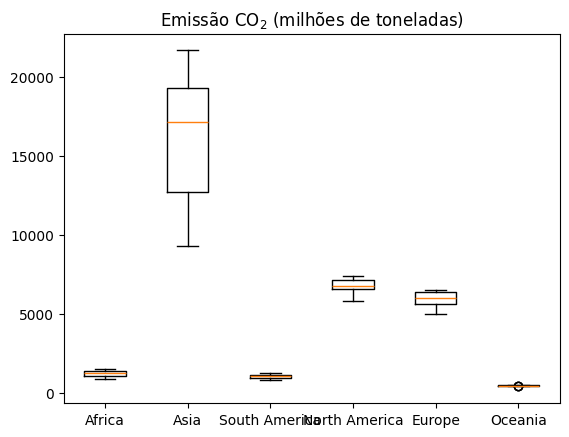

In [16]:
fig_bp, ax_bp = plt.subplots()
emissoes_areas_geo = list(dados_areas_geo.values())
# boxplot = ax_bp.boxplot(emissoes_areas_geo, labels=areas_geo)
boxplot = ax_bp.boxplot(dados_trabalho, labels=areas_geo)
ax_bp.set_title(r"Emissão CO$_2$ (milhões de toneladas)")
fig_bp.show()


### Tabela de correlação